In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno
import numpy as np
plt.style.use('seaborn-dark')

In [2]:
#initializing here as it can be used in the palette parameter
color=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap','CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b','tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight','twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter','winter_r']

# Importing and analyzing data

In [3]:
train=pd.read_csv(r"C:\Users\Ashinth\Documents\courses\Kaggle\competetions\Passenger Satisfaction\train.csv")
test=pd.read_csv(r"C:\Users\Ashinth\Documents\courses\Kaggle\competetions\Passenger Satisfaction\test.csv")

In [4]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Identifying the number of classes **in** the __target variable__
 

In [5]:
train.satisfaction.unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

* Checking for null values

In [6]:
train.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Checking the arrival delay so that the missing values might be where there was no delays

In [7]:
train['Arrival Delay in Minutes'].value_counts()

0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
458.0        1
729.0        1
382.0        1
459.0        1
369.0        1
Name: Arrival Delay in Minutes, Length: 455, dtype: int64

In [8]:
train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


<AxesSubplot:>

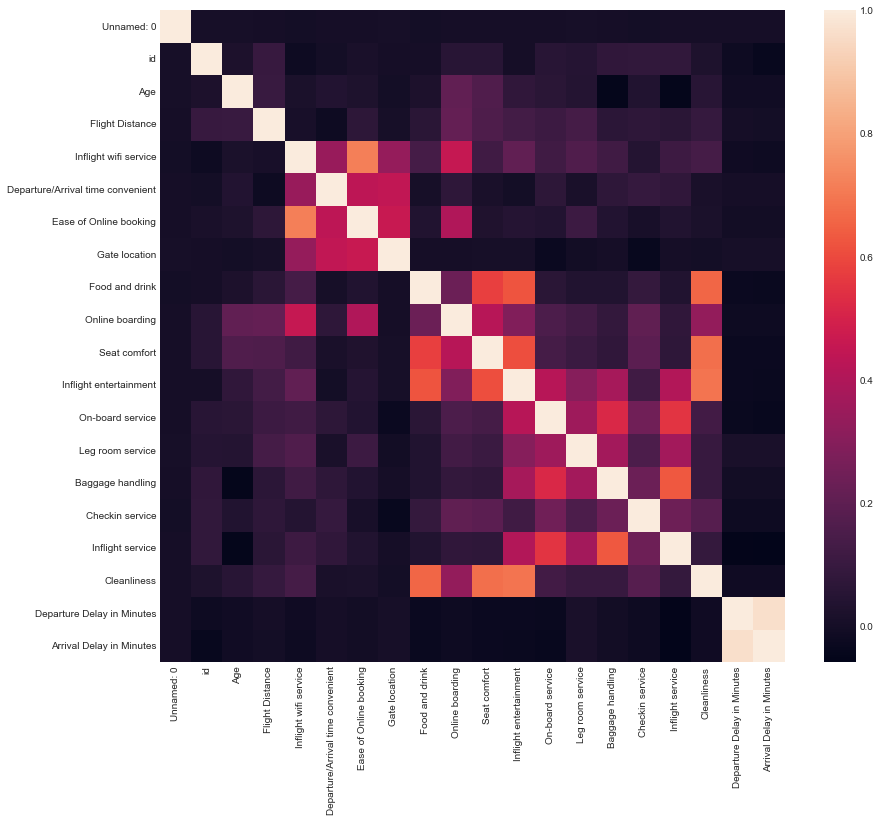

In [9]:
plt.figure(figsize=(14,12))
correlations=train.corr()
sns.heatmap(correlations)

# EDA

Encoding the categoricals

In [10]:
obj_cols=[col for col in train.columns if train[col].dtype=='object']
cat_cols=[col for col in train.columns if (train[col].dtype=='object'or train[col].nunique()<=10)  ]
for col in obj_cols:
    train[col].factorize()

 ### Relating the arrival and departure delays and Relating the satisfaction and customer loyalty

Text(0.5, 1.0, 'delay during flight journey')

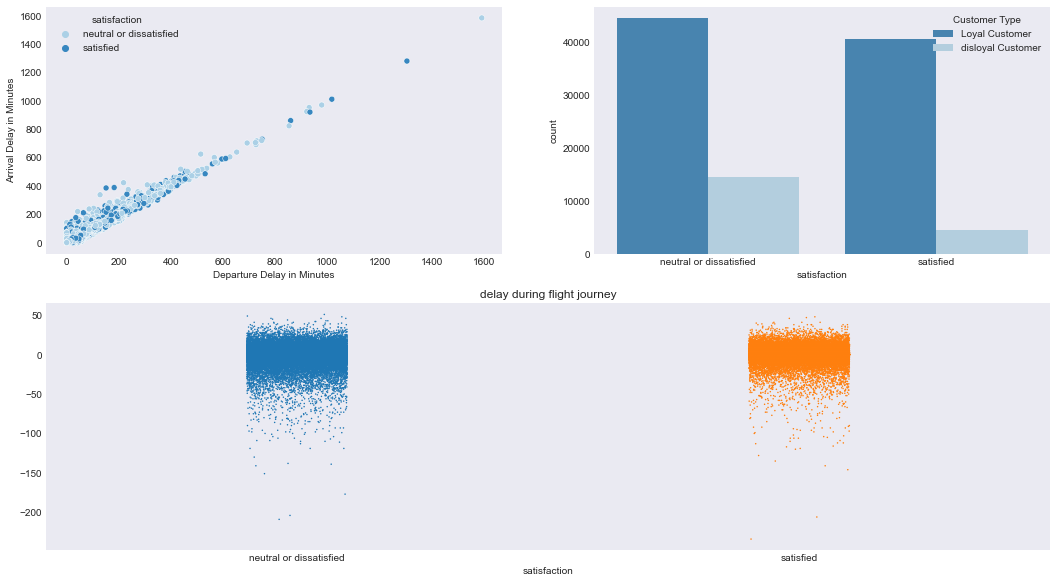

In [11]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.scatterplot(x='Departure Delay in Minutes',y='Arrival Delay in Minutes',data=train,hue='satisfaction',palette='Blues')
plt.subplot(2,2,2)
sns.countplot(x=train['satisfaction'],hue=train['Customer Type'],palette='Blues_r')
diff_delay=train['Departure Delay in Minutes']-train['Arrival Delay in Minutes']
plt.subplot(2,2,(3,4))
sns.stripplot(x=train['satisfaction'],y=diff_delay,size=1.5)
plt.title("delay during flight journey")

There are some extraordinarily high values for the delay(>1000 minutes)

* As we can see, many passengers have been dissatisfied,even the ones whose flight did not have any arrival delays.
* Also , there is no relation between satisfation and customer loyalty, as loyal customers are equally unhappy

### Age

Text(0.5, 1.0, 'Variation of satisfaction with respect to age')

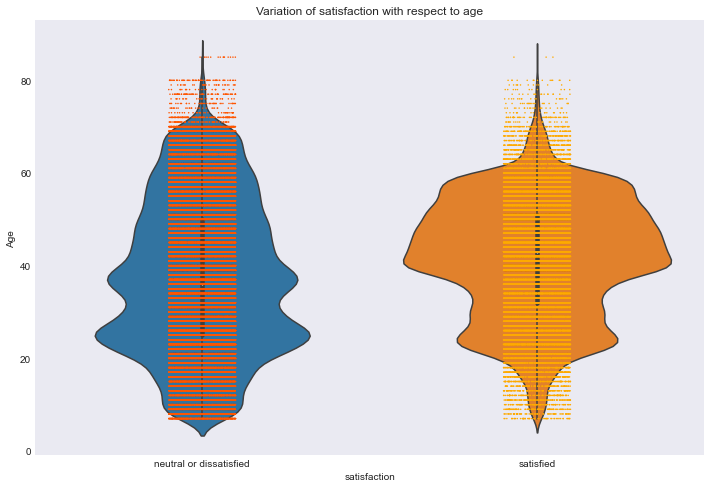

In [12]:
plt.figure(figsize=(12,8))
sns.violinplot(x='satisfaction',y='Age',data=train)
sns.stripplot(x='satisfaction',y='Age',data=train,size=1.5,palette='autumn')
plt.title('Variation of satisfaction with respect to age')

A majority of **middle aged people** seem to be satisfied, on the contrary, **ppl above the age of 60** are more likely not to be satisfied

### Other categorical variables

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

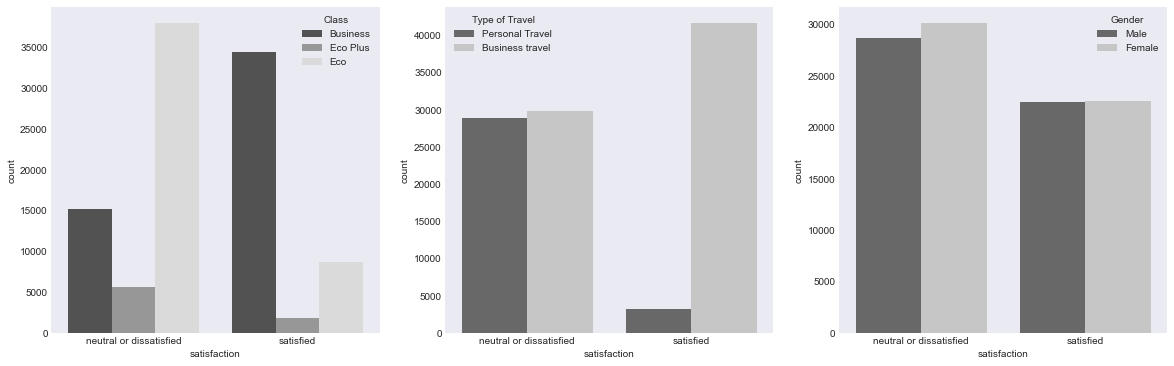

In [13]:
colour_palette=color[np.random.randint(len(color))]
fig,ax =plt.subplots(1,3)
fig.set_figwidth(20)
fig.set_figheight(6)
sns.countplot(x='satisfaction',hue='Class',hue_order=['Business','Eco Plus','Eco'],data=train,ax=ax[0],palette=colour_palette)
sns.countplot(x='satisfaction',hue='Type of Travel',data=train,ax=ax[1],palette=colour_palette)
sns.countplot(x='satisfaction',hue='Gender',data=train,ax=ax[2],palette=colour_palette)

In [14]:
train['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

A majority of the **personal travel** passengers and passengers of the **economic class** are not satisfied are not satisfied.

### Flight Distance

<AxesSubplot:xlabel='Flight Distance', ylabel='satisfaction'>

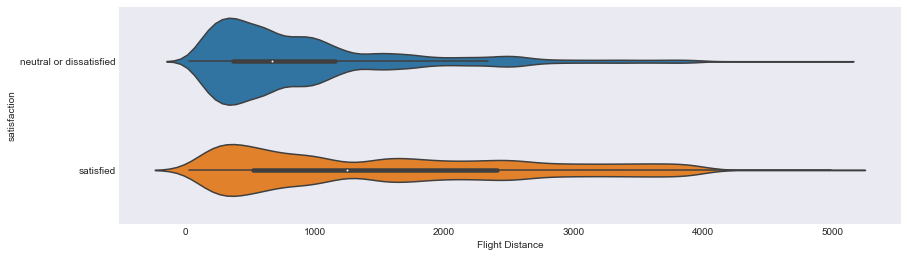

In [15]:
fig,ax= plt.subplots()
fig.set_figwidth(14)
sns.violinplot(x='Flight Distance',data=train,y='satisfaction')

Most of the **long journey flights** have been satisfactory.

### Infilght Entertainment/Inflight Service

Some passengers would really want a proper service and ofcourse the long journeys would definitely had to have some entertainment to satisfy the passengers.

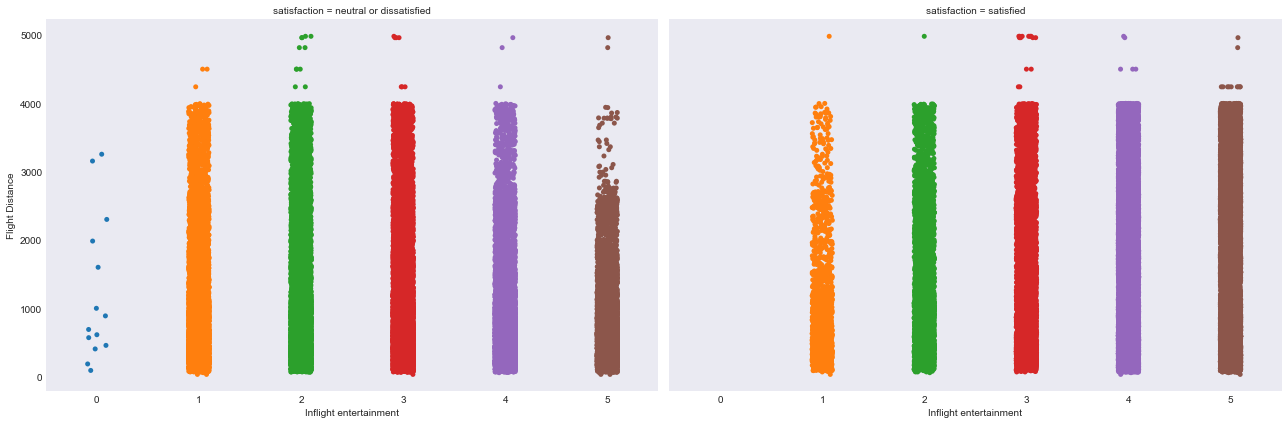

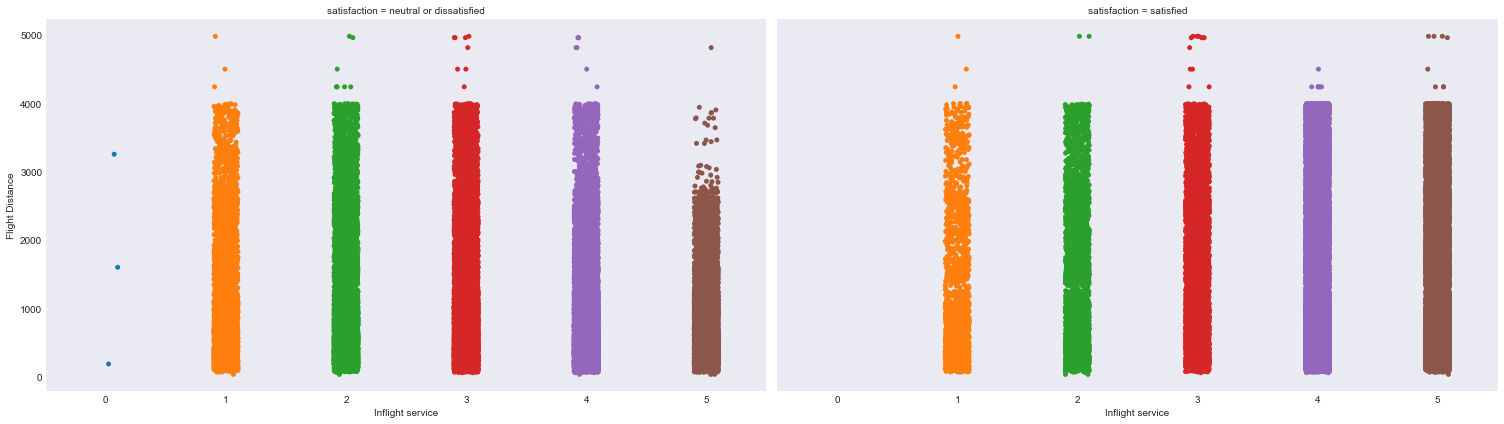

In [16]:
sns.catplot(kind='strip',col='satisfaction',x='Inflight entertainment',y='Flight Distance',height=6,aspect=1.5,data=train)
sns.catplot(kind='strip',col='satisfaction',x='Inflight service',height=6,aspect=1.75,y='Flight Distance',data=train)


Upon observation in the satisfied category there seems to be no **zeros** and also there is more **5** for longer distances 

### wifi

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

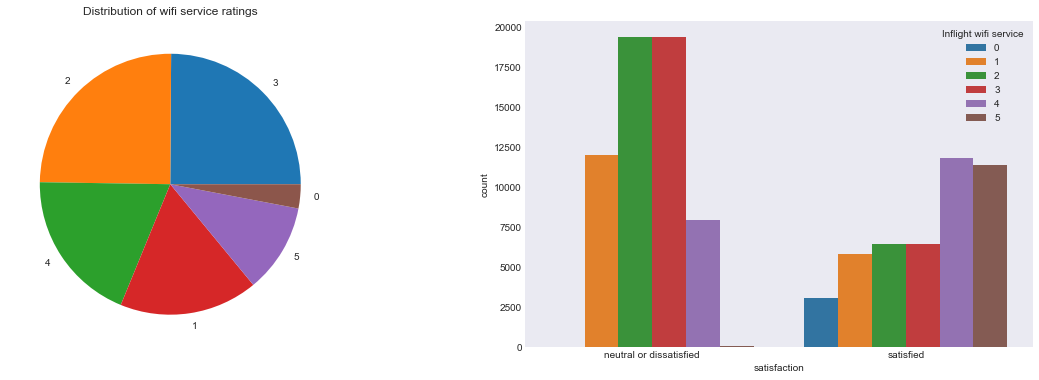

In [17]:
fig,ax=plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(6)
ax[0].pie(list(train['Inflight wifi service'].value_counts()),labels=train['Inflight wifi service'].unique())
ax[0].set_title("Distribution of wifi service ratings")
sns.countplot(x='satisfaction',hue='Inflight wifi service',data=train,ax=ax[1],palette=color[np.random.randint(len(color))])

The satisfied passengers either had **no wifi** or **the best wifi**

### Online Booking
Checking the variation of online booking with respect to age

<AxesSubplot:xlabel='Ease of Online booking', ylabel='Age'>

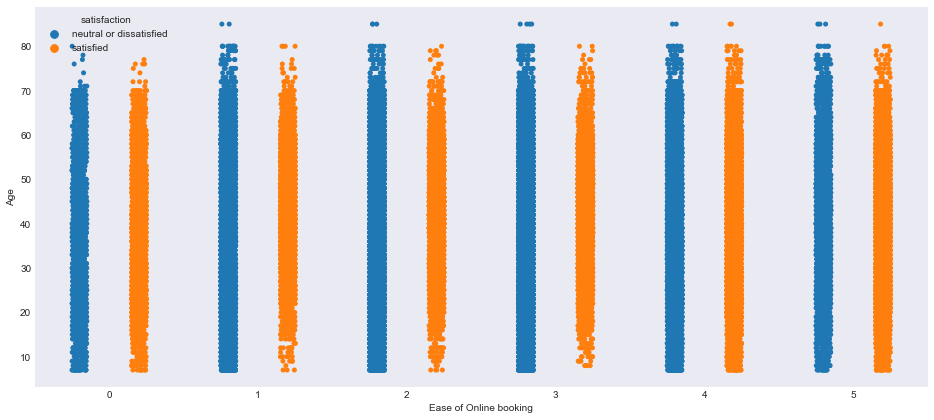

In [18]:
plt.figure(figsize=[16,7])
sns.stripplot(x='Ease of Online booking',y='Age',data=train,hue='satisfaction',dodge=True)

Contrary to what have been expected, many older people have done the booking online(**not zero**), howeverthe older age group who have done the booking online seem less likely to be satisfied

# Data Cleaning/Preprocessing

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [20]:
data=pd.concat([train,test])
data.set_index('Unnamed: 0')
data.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

Splitting the data back to train and test

In [21]:
mean_flight_duration_delay=diff_delay.mean()
data['Arrival Delay in Minutes'].fillna(mean_flight_duration_delay,inplace=True)

In [22]:
train=data[:103594]
test=data[103594:]

Encoding the columns with datatype **object**

In [23]:
encoder=OrdinalEncoder()
train[obj_cols]=encoder.fit_transform(train[obj_cols])
test[obj_cols]=encoder.transform(test[obj_cols])

c:\Users\Ashinth\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
c:\Users\Ashinth\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


predictors(**X**) and target variable(**y**)

In [24]:
y_train=train.pop('satisfaction')
y_test=test.pop('satisfaction')
X_train=train
X_test=test

In [25]:
X_train=X_train.drop('id',axis=1)
X_test=X_test.drop('id',axis=1)

The only scaleable quantity here seems to be the flight distance, which can be performed to see if the model score improves or not.

# Modelling

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [31]:
k_model=KNeighborsClassifier()
log_reg_model=LogisticRegression()
svc_model=SVC()
tree_model=DecisionTreeClassifier()
net_model=MLPClassifier()
forest_model=RandomForestClassifier()
extra_model=ExtraTreesClassifier()
ada_model=AdaBoostClassifier()
xgb_model=XGBClassifier()

models=[k_model, log_reg_model, svc_model, tree_model, net_model, forest_model, extra_model, ada_model, xgb_model]
model_names=['KNN','Logistic Regression','SVM','Decision Tree','Neural Network','Random Forest','Extra trees','Adaboost','XG Boost']

takes too long to run

In [39]:
scores=list()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
for i in range(len(models)):
    models[i].fit(X_train,y_train)
    predictors=models[i].predict(X_test)
    score=accuracy_score(predictors,y_test)
    print('\n',model_names[i],score)
    print('\n',confusion_matrix(y_test,predictors))
    scores.append(score)


 KNN 0.5983413223769307

 [[9924 4818]
 [5740 5804]]

 Logistic Regression 0.6037053945065814

 [[8987 5755]
 [4662 6882]]

 SVM 0.6509929239899567

 [[12902  1840]
 [ 7334  4210]]

 Decision Tree 0.9439245225595374

 [[13941   801]
 [  673 10871]]

 Neural Network 0.831621395419615

 [[11851  2891]
 [ 1535 10009]]

 Random Forest 0.9632123563874305

 [[14433   309]
 [  658 10886]]

 Extra trees 0.9615765046032109

 [[14422   320]
 [  690 10854]]

 Adaboost 0.9263866697101119

 [[13853   889]
 [ 1046 10498]]

 XG Boost 0.9624134520276953

 [[14396   346]
 [  642 10902]]


<AxesSubplot:xlabel='Model Score', ylabel='Model Name'>

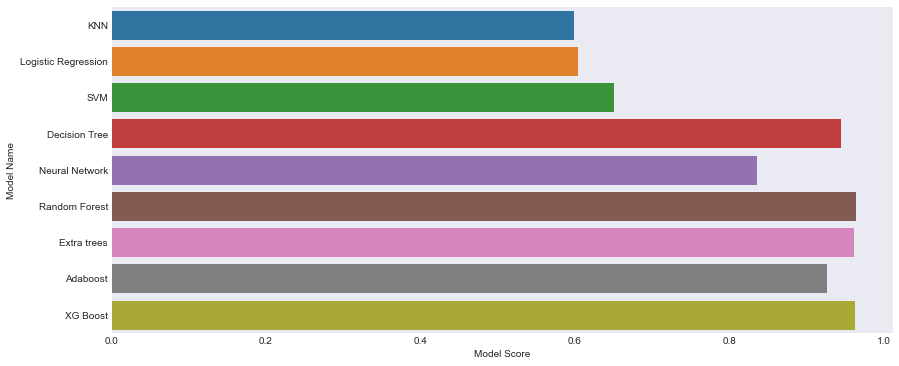

In [36]:
model_scores=pd.DataFrame((model_names,scores)).transpose()
model_scores.columns=['Model Name','Model Score']
model_scores.set_index('Model Name',inplace=True)

plt.figure(figsize=[14,6])
sns.barplot(x=model_scores['Model Score'],y=model_scores.index)